# INTRODUCTION
This notebook demonstrates the perceptron classifier on Iris dataset to classify two types of Iris flowers on the basis of the petal width and length. Perceptron learning rule is implemented.

# Class Perceptron
## Parameters
---
eta : float<br>
Learning rate (between 0.0 and 1.0)<br>
n_iter : int<br>
<br>
Passes over the training dataset.
    
## Attributes
---
W : 1d-array Weights after fitting.<br>
errors_ : list Number of misclassifications in every epoch.


In [57]:
class Perceptron(object):
    def __init__(self, eta=0.001, n_iter=8000):
        self.eta = eta
        self.n_iter = n_iter

    def fit(self, X, y):
        """Fit training data.
        Parameters
        ----------
        X : {array-like}, shape = [n_samples, n_features]
        Training vectors, where n_samples
        is the number of samples and
        [ 25 ]
        www.allitebooks.comTraining Machine Learning Algorithms for Classification
        n_features is the number of features.
        y : array-like, shape = [n_samples]
        Target values.
        Returns
        -------
        self : object
        """
        self.W = np.zeros(1 + X.shape[1])
        self.errors_ = []
        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.W[1:] += update * xi
                self.W[0] += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        print(self.errors_)
        return self

    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.W[1:]) + self.W[0]

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.net_input(X) >= 0.0, 1, -1)

# Read the dataset

In [8]:
import pandas as pd
df = pd.read_csv("data.csv")

# Convert it into numpy

In [14]:
import numpy as np
y = df.iloc[0:200, 5].values
y = np.where(y == 'Iris-setosa', -1, 1)
X = df.iloc[0:200, [0, 2]].values

[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1]


# Plot the data

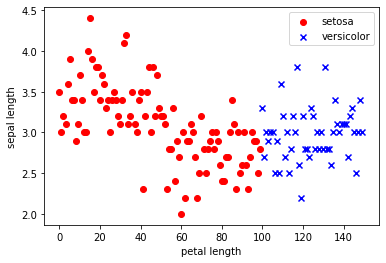

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(X[:100, 0], X[:100, 1],color='red', marker='o', label='setosa')
plt.scatter(X[100:200, 0], X[100:200, 1], color='blue', marker='x', label='versicolor')
plt.xlabel('petal length')
plt.ylabel('sepal length')
plt.legend(loc='upper right')
plt.show()

# Train the classifier

In [56]:
P_Classifier = Perceptron()
P_Classifier.fit(X,y)

[2, 11, 6, 3, 3, 8, 4, 3, 4, 5, 6, 5, 2, 4, 5, 5, 2, 4, 3, 4, 2, 4, 2, 5, 2, 4, 2, 4, 4, 2, 4, 4, 3, 2, 4, 3, 2, 3, 3, 3, 3, 3, 2, 3, 3, 4, 2, 3, 2, 3, 2, 4, 2, 3, 2, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 2, 3, 2, 3, 3, 3, 2, 3, 3, 2, 3, 2, 3, 3, 3, 4, 2, 2, 4, 2, 3, 2, 2, 4, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 2, 3, 3, 3, 2, 3, 3, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 2, 3, 3, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 2, 3, 3, 3, 3, 2, 3, 3, 2, 3, 3, 2, 3, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 2, 3, 3, 2, 3, 3, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 2, 3, 2, 2, 3, 2, 2, 3, 3, 2, 3, 3, 2, 3, 3, 2, 2, 3, 2, 2, 3, 2, 2, 3, 2, 2, 3, 3, 2, 3, 3, 2, 2, 3, 2, 2, 3, 2, 2, 3, 2, 3, 2, 2, 3, 2, 2, 3, 2, 2, 3, 2, 2, 3, 2, 3, 2, 2, 3, 2, 2, 3, 2, 2, 3, 2, 2, 3, 2, 3, 3, 2, 2, 3, 2, 2, 3,

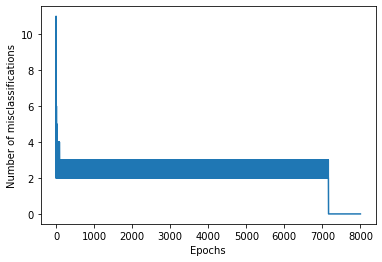

In [58]:
plt.plot(range(1, len(P_Classifier.errors_) + 1), P_Classifier.errors_)
plt.xlabel('Epochs')
plt.ylabel('Number of misclassifications')
plt.show()

# Visualize the decision boundary

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


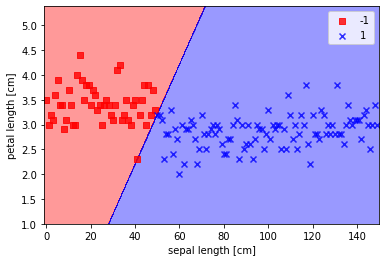

In [59]:
from matplotlib.colors import ListedColormap
def plot_decision_regions(X, y, classifier, resolution=0.02):
    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
    np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
        alpha=0.8, c=cmap(idx),
        marker=markers[idx], label=cl)
plot_decision_regions(X,y,P_Classifier)
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper right')
plt.show()